In [14]:
from google.colab import drive
drive.mount("/content/gdrive/")

ModuleNotFoundError: No module named 'google'

# I- Préaparation des données

### 1- Informations sur les données

In [ ]:
import os
print(os.getcwd())

/Volumes/SSD/Nextcloud/Documents/ISEN/Cours/Obsidian Vault/ISEN/IA/CIPA4/TP/TP1


In [3]:
%pip install pandas
import pandas as pd

file_path = 'housing.csv'

try:
    housing_df = pd.read_csv(file_path)

    print(housing_df["longitude"])

    display(housing_df.head())

except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

Note: you may need to restart the kernel to use updated packages.
0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



C'est un problème de régression.

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Il y a moins de total_bedrooms que le reste

L'attribut ocean_proximity n'est pas du même type que le reste des attributs

In [ ]:
housing_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 2.0 MB/s  0:00:04 eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.1 MB/s  0:00:02 eta 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.1 MB/s  0:00:04 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


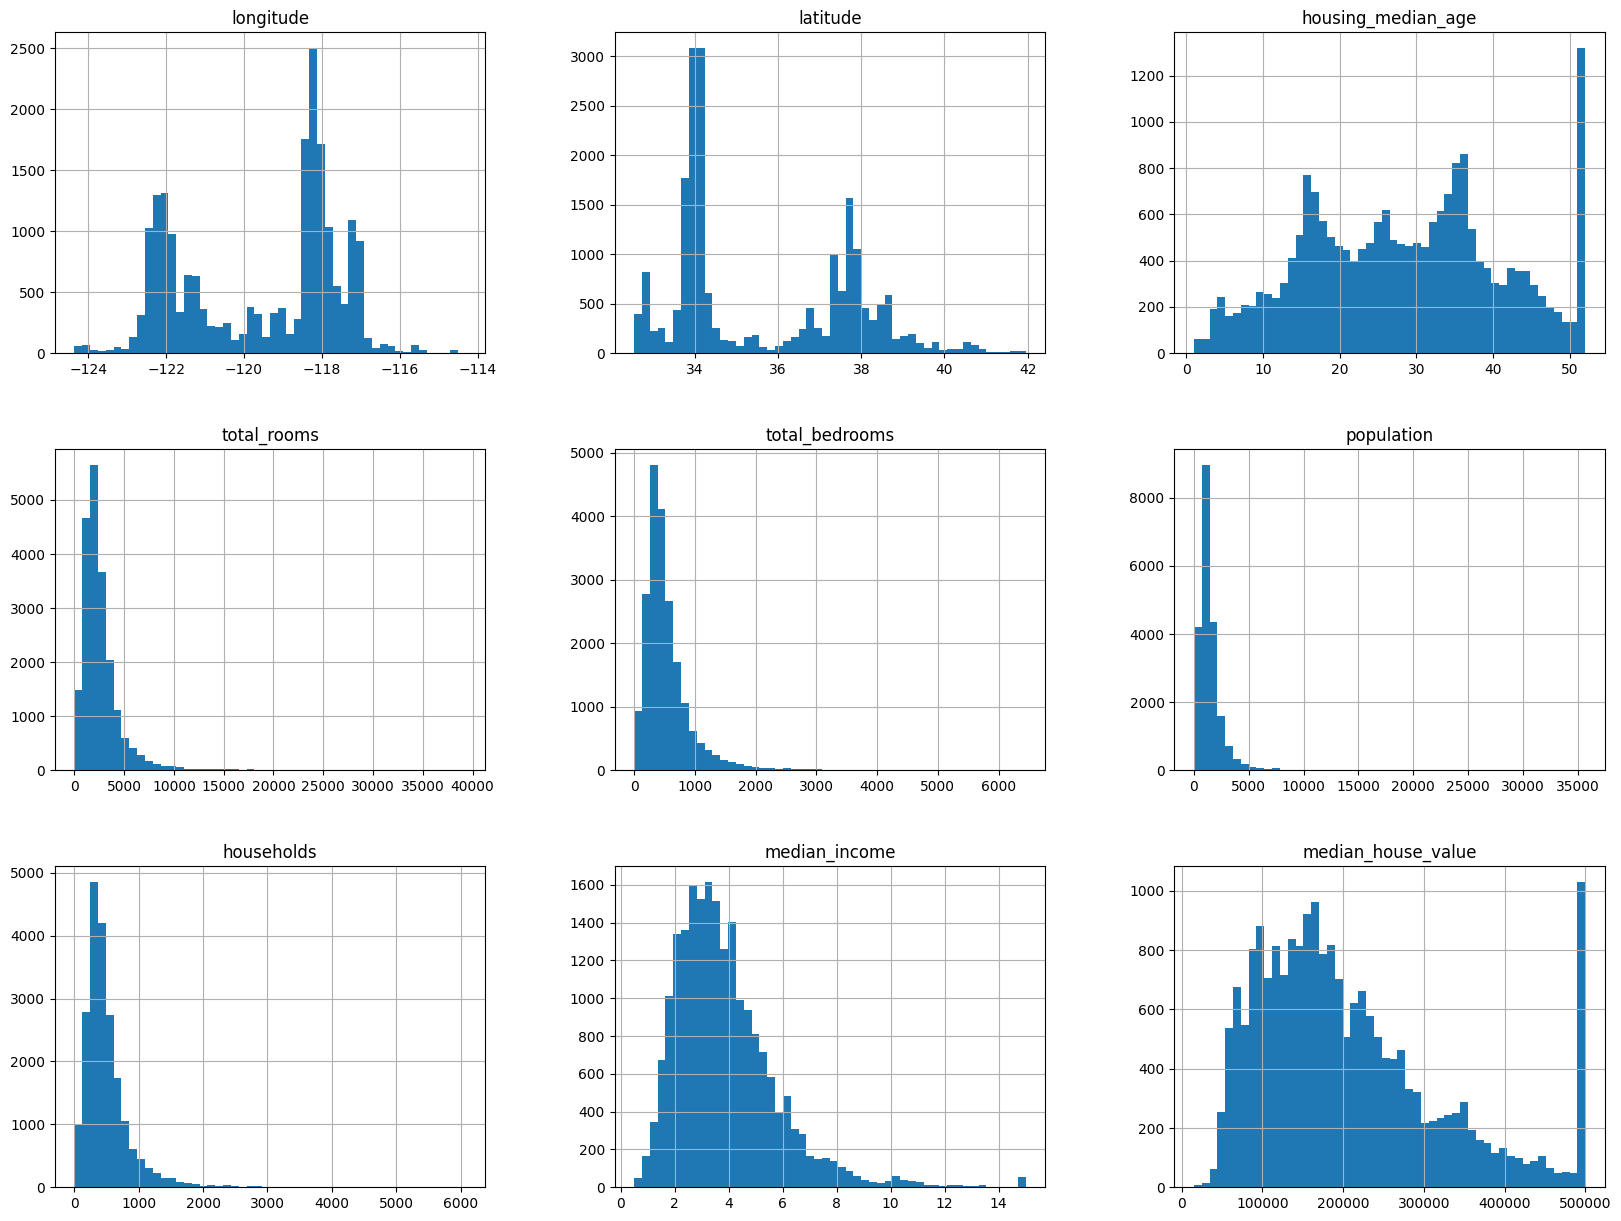

In [ ]:
%pip install matplotlib
import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

### 2- Répartition des données

In [ ]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_df, test_size=0.2)

# Display the first instances of the test set
display(test_set.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.1 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 1.1 MB/s  0:00:18m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8803,-118.40,33.78,26.0,5005.0,776.0,2357.0,790.0,8.5421,500001.0,NEAR OCEAN
18072,-122.00,37.28,35.0,3133.0,541.0,1449.0,555.0,5.7295,346100.0,<1H OCEAN
7879,-118.11,33.87,33.0,1379.0,254.0,795.0,297.0,4.6713,231800.0,<1H OCEAN
17940,-121.94,37.33,36.0,1893.0,359.0,797.0,360.0,3.6818,257600.0,<1H OCEAN
17812,-121.86,37.39,17.0,1777.0,328.0,1235.0,329.0,5.4225,258100.0,<1H OCEAN


### 3- Découverte et visualisation des données

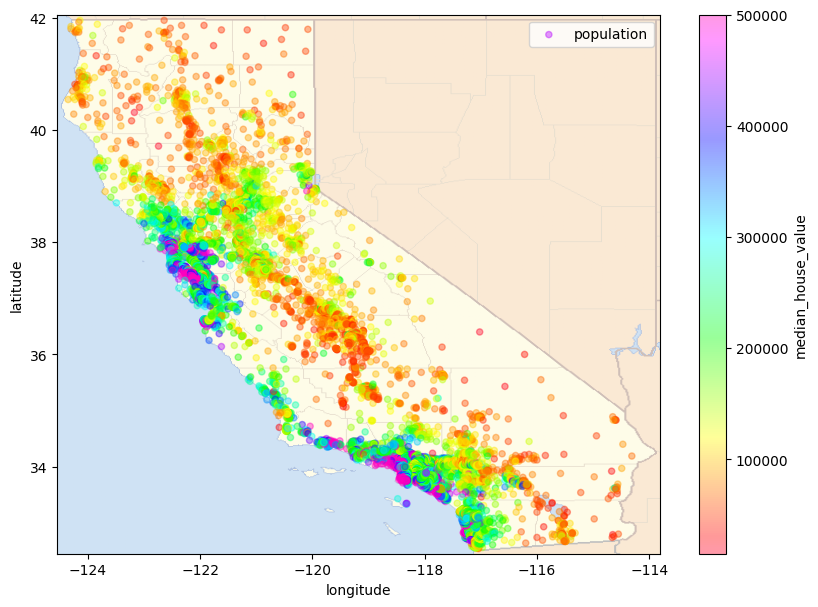

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img_path = "california.png"

california_img = mpimg.imread(img_path)
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
label="population", c="median_house_value", colormap='gist_rainbow', colorbar=True, 
sharex=False, figsize=(10,7))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
 cmap=plt.get_cmap("jet"))
plt.legend()

In [5]:
corr_matrix = housing_df.corr(numeric_only=True)
display(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### 4- Nettoyage des données

In [6]:
input = housing_df.drop("median_house_value", axis=1)
output = housing_df["median_house_value"]

In [7]:
median_bedrooms = housing_df["total_bedrooms"].median()
input["total_bedrooms"].fillna(median_bedrooms, inplace=True)
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


/var/folders/s3/h0zk0ry17wj548yl0tfrdrcw0000gn/T/ipykernel_12573/1205497436.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  input["total_bedrooms"].fillna(median_bedrooms, inplace=True)


In [10]:
display(input["ocean_proximity"].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat = input[["ocean_proximity"]]

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

display(housing_cat_encoded[:10])

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

# II- Séléction et apprentissage du modèle

### 1- Apprentissage des données

In [12]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

# Replace the original 'ocean_proximity' column with the numerically encoded data
input["ocean_proximity"] = housing_cat_encoded

linear_regression.fit(input, output)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 2- Evaluation du modèle d'apprentissage sur les données d'apprentissage

In [13]:
predictions = linear_regression.predict(input)

print("Real Labels:")
display(output.head())

print("\nPredicted Labels:")
display(predictions[:5])

Real Labels:


0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


Predicted Labels:


array([408947.20560817, 420997.19787779, 378946.00266875, 320982.31781834,
       253744.67097433])

In [14]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(output, predictions)
print("RMSE:", rmse)

RMSE: 4852254699.072869


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor()
tree_reg.fit(input, output)

predictions = tree_reg.predict(input)

rmse = mean_squared_error(output, predictions)
print("RMSE:", rmse)

RMSE: 0.0


### 3- Evaluation du modèle d'apprentissage sur les données de validation

In [16]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, input, output, scoring="neg_mean_squared_error", cv=10)

rmse_scores = np.sqrt(-scores)

print("RMSE for each fold:")
display(rmse_scores)

print("\nMean of RMSE scores:")
display(rmse_scores.mean())

print("\nStandard deviation of RMSE scores:")
display(rmse_scores.std())

RMSE for each fold:


array([128236.37248604,  70121.31323496,  84772.09265328,  78099.17213154,
        88279.93991474,  82199.36869534,  75713.99489832, 128485.36190114,
       103719.40221721,  76373.83536599])


Mean of RMSE scores:


np.float64(91600.08534985578)


Standard deviation of RMSE scores:


np.float64(20306.295068308726)